## Fonseca and Fleming function 

Problem taken from \[Fonseca, C. M.; Fleming, P. J. (1995). An Overview of Evolutionary Algorithms in Multiobjective Optimization. Evol Comput. 3 (1): 1–16\], defined as follows:

---

*Minimize*

$f_1 (x_1,x_2,x_3) = 1-\exp \left[ -\sum \limits_{i=1}^3 \left(x_i - \frac{1}{\sqrt{3}} \right)^2 \right]$

$f_2 (x_1,x_2,x_3) = 1-\exp \left[ -\sum \limits_{i=1}^3 \left(x_i + \frac{1}{\sqrt{3}} \right)^2 \right]$

*in the domain*

$-4 \le x_1,x_2,x_3 \le 4$

In [1]:
from mosa import Anneal
from time import time
from math import exp,sqrt
%matplotlib inline

### Translates the Fonseca and Fleming problem into Python code

In the Python function *fobj* below, $f_1$ and $f_2$ are the functions to be minimized. The argument of the Python function is a dictionary with just one key, $X$, representing a trial solution to the problem. This is a unconstrained problem, so we do not have to worry about how to deal with constraints. The return value must be a list containing  𝑓1  and  𝑓2 .

In [2]:
def fobj(solution):
    g1=0.0
    g2=0.0
    Y=1.0/sqrt(3.0)
    
    for i in range(3):
        g1+=pow((solution["X"][i]-Y),2)
        g2+=pow((solution["X"][i]+Y),2)
        
    f1=1.0-exp(-g1)
    f2=1.0-exp(-g2)
    
    return [f1,f2]

### Initialization

First, an *Anneal* object is created.

Then, a population is defined. The population is a dictionary and its key $X$ is the same key that will be present in the trial solutions to the problem. In the case of the Fonseca and Fleming problem, we used only one key because the varialbes $x_1$, $x_2$ and $x_3$ have the same boundaries. Since the solution space is continuous for $X$ in the domain defined above, $X$, the value **None** is assigned to $X$.

In [3]:
opt=Anneal()
opt.archive_size=10000
opt.maximum_archive_rejections=10000

--------------------------------------------------
    MULTI-OBJECTIVE SIMULATED ANNEALING (MOSA)    
--------------------------------------------------
      Developed by Dr. Roberto G. A. Veiga
   Universidade Federal do ABC (UFABC), Brazil




In [4]:
opt.population={"X":None}

### Hot run

A first run starting at very high temperatures (1) is performed. This initial "hot run" apparently helps the algorithm not to be trapped in specific regions of the solution space, which ends up in the algorithm missing the Pareto front. The optimization algorithm itself is carried out by the function *evolve*, which takes the *fobj* function above as argument.

In [5]:
opt.initial_temperature=1.0
opt.number_of_iterations=1000
opt.number_of_temperatures=100
opt.temperature_decrease_factor=0.95
opt.number_of_solution_elements={"X":3}
opt.mc_step_size={"X":1.0}
opt.solution_bounds={"X":[-4.0,4.0]}

In [6]:
start=time()
opt.evolve(fobj)
end=time()
print("   Elapsed time: %f s" % (end-start))

--- BEGIN: Evolving a solution ---

Looking for a solution in the checkpoint file...
Done!
Trying to load the archive from file archive.json...
Done!
------
Population/solution keys:
    ['X']:
        Number of elements in the solution: 3
        Continuous sampling space
        Boundaries: [-4.0000,4.0000]
        Selection weight of this key: 1.000000
        Probability of element exchange between population and solution: 100.000000
        Probability of element insertion to/deletion from solution: 0.000000
        Solution sorted after change: False
        Maximum step size to choose a new value in the solution: 1.000000
------
Initial solution loaded from the checkpoint file...
Done!
------
TEMPERATURE: 1.000000
    Number of accepted moves: 992.
    Fraction of accepted moves: 0.992000.
    No archive update.
------
TEMPERATURE: 0.950000
    Number of accepted moves: 996.
    Fraction of accepted moves: 0.996000.
    No archive update.
------
TEMPERATURE: 0.902500
    Number 

### Cold run

After the "hot run", a "cold run" starting at a much lower temperature (0.01) is performed to allow the solutions to relax to the vicinity of the Pareto front.

Solutions produced by the "hot run" were taken from the archive.

In [7]:
opt.initial_temperature=0.01
opt.mc_step_size={"X":0.1}

In [8]:
start=time()
opt.evolve(fobj)
end=time()
print("   Elapsed time: %f s" % (end-start))

--- BEGIN: Evolving a solution ---

Looking for a solution in the checkpoint file...
Done!
------
Population/solution keys:
    ['X']:
        Number of elements in the solution: 3
        Continuous sampling space
        Boundaries: [-4.0000,4.0000]
        Selection weight of this key: 1.000000
        Probability of element exchange between population and solution: 100.000000
        Probability of element insertion to/deletion from solution: 0.000000
        Solution sorted after change: False
        Maximum step size to choose a new value in the solution: 0.100000
------
Initial solution loaded from the checkpoint file...
Done!
------
TEMPERATURE: 0.010000
    Number of accepted moves: 810.
    Fraction of accepted moves: 0.810000.
    Number of archive updates: 2.
    Fraction of archive updates in accepted moves: 0.002469.
------
TEMPERATURE: 0.009500
    Number of accepted moves: 611.
    Fraction of accepted moves: 0.611000.
    Number of archive updates: 6.
    Fraction of 

    Number of accepted moves: 222.
    Fraction of accepted moves: 0.222000.
    Number of archive updates: 2.
    Fraction of archive updates in accepted moves: 0.009009.
------
TEMPERATURE: 0.001353
    Number of accepted moves: 219.
    Fraction of accepted moves: 0.219000.
    Number of archive updates: 11.
    Fraction of archive updates in accepted moves: 0.050228.
------
TEMPERATURE: 0.001285
    Number of accepted moves: 229.
    Fraction of accepted moves: 0.229000.
    Number of archive updates: 4.
    Fraction of archive updates in accepted moves: 0.017467.
------
TEMPERATURE: 0.001221
    Number of accepted moves: 227.
    Fraction of accepted moves: 0.227000.
    Number of archive updates: 5.
    Fraction of archive updates in accepted moves: 0.022026.
------
TEMPERATURE: 0.001160
    Number of accepted moves: 205.
    Fraction of accepted moves: 0.205000.
    Number of archive updates: 4.
    Fraction of archive updates in accepted moves: 0.019512.
------
TEMPERATURE: 0.0

    Number of accepted moves: 41.
    Fraction of accepted moves: 0.041000.
    Number of archive updates: 1.
    Fraction of archive updates in accepted moves: 0.024390.
------
TEMPERATURE: 0.000135
    Number of accepted moves: 26.
    Fraction of accepted moves: 0.026000.
    No archive update.
------
TEMPERATURE: 0.000128
    Number of accepted moves: 27.
    Fraction of accepted moves: 0.027000.
    No archive update.
------
TEMPERATURE: 0.000121
    Number of accepted moves: 23.
    Fraction of accepted moves: 0.023000.
    Number of archive updates: 3.
    Fraction of archive updates in accepted moves: 0.130435.
------
TEMPERATURE: 0.000115
    Number of accepted moves: 22.
    Fraction of accepted moves: 0.022000.
    Number of archive updates: 5.
    Fraction of archive updates in accepted moves: 0.227273.
------
TEMPERATURE: 0.000110
    Number of accepted moves: 16.
    Fraction of accepted moves: 0.016000.
    Number of archive updates: 2.
    Fraction of archive updates in

### Output

After eliminating the dominated solutions, the non-dominated solutions and respective values are printed and the resulting Pareto front is displayed.

In [9]:
purged=opt.purgedominated()
opt.printx(purged)

===
Solutions:
1) {'X': [-0.0370715619315376, 0.02338495174756572, -0.04027919996631324]}
2) {'X': [0.07383734544103371, 0.02338495174756572, -0.08605692275789156]}
3) {'X': [0.13872009895655268, 0.21477341386277993, 0.1434675620826762]}
4) {'X': [0.05806316074433804, -0.08707734913204224, -0.08620353268379377]}
5) {'X': [-0.2612905235155034, -0.28724672033010035, -0.18421898029521255]}
6) {'X': [-0.07221658742578763, 0.041871030152124566, 0.07269791449736851]}
7) {'X': [0.5767338166087759, 0.5236722324770537, 0.5267702498660554]}
8) {'X': [-0.11873575600581154, -0.18890760383123428, -0.14154987171994793]}
9) {'X': [-0.06217351213244093, -0.15010003997091115, -0.21821477744375484]}
10) {'X': [-0.20636670668567825, -0.15010003997091115, -0.21821477744375484]}
11) {'X': [0.1752494409677121, 0.31961346982128847, 0.2308270415152227]}
12) {'X': [0.2038561384443276, 0.09766068142718298, 0.05818884502962418]}
13) {'X': [0.2038561384443276, 0.13036467447441336, 0.05818884502962418]}
14) {'X': 

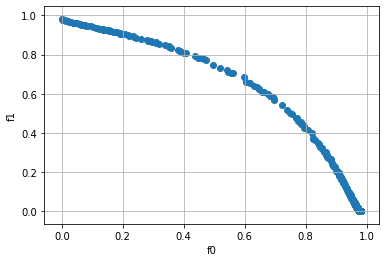

In [10]:
opt.plotfront(purged)